# Classical Time Series (TS) Forecasting Cont.


## Overview

1. **Classical Forecasting Methods**
    * Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX)
    * Vector Autoregression (VAR)
    * Vector Autoregression Moving-Average (VARMA)
    * Vector Autoregression Moving-Average with Exogenous Regressors (VARMAX)
    * Simple Exponential Smoothing (SES)
    * Holt Winter’s Exponential Smoothing (HWES)

### Load Basic Libraries

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%load_ext watermark
%watermark -v -m -p numpy,pandas,skmultilearn -g

import os
import sys
import re
from tqdm import tqdm
import yaml
import watermark
from math import floor
from random import random
from pprint import pprint as pp
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
from pandas.plotting import register_matplotlib_converters    # for pandas_profiling

register_matplotlib_converters()                              # for pandas_profiling
sys.path.append(os.pardir)

CPython 3.7.3
IPython 7.5.0

numpy 1.16.4
pandas 0.24.2
skmultilearn unknown

compiler   : GCC 7.3.0
system     : Linux
release    : 5.0.0-23-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit
Git hash   : c67a2f12b4f0cabfba153b66ad43f70d1453a763


## Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX)

This is an extension of the SARIMA model that also includes the modeling of exogenous variables.

Exogenous variables are also called covariates and can be thought of as parallel input sequences that have observations at the same time steps as the original series. The primary series may be referred to as endogenous data to contrast it from the exogenous sequence(s). The observations for exogenous variables are included in the model directly at each time step and are not modeled in the same way as the primary endogenous sequence (ex. as an AR, MA, etc. process).

The SARIMAX method can also be used to model the subsumed models with exogenous variables, such as ARX, MAX, ARMAX, and ARIMAX by setting to zero the corresponding parameters.

The method is suitable for univariate time series with trend and/or seasonal components and exogenous variables.

In [8]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# create data
data1 = [x + random() for x in range(1, 100)]
data2 = [x + random() for x in range(101, 200)]

# fit model
model = SARIMAX(data1, exog=data2, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit(disp=False)

# make prediction
exog2 = [200 + random()]
predictions = model_fit.predict(len(data1), len(data1), exog=[exog2])

### Vector Autoregression (VAR)
The **VAR** method is the generalization of AR to multiple parallel time series (ex. multivariate time series).     This method models the next step in each time series using an AR model. We refer to this model as VAR(p).

The method is suitable for multivariate time series without trend and seasonal components.

In [12]:
from statsmodels.tsa.vector_ar.var_model import VAR

data = list()
for i in range(100):
    v1 = i + random()
    v2 = v1 + random()
    row = [v1, v2]
    data.append(row)
    
# fit model
VAR_model = VAR(data)
VAR_results = VAR_model.fit()
# make prediction
predictions = VAR_results.forecast(VAR_results.y, steps=1)
print("VAR Model Prediction: %s" % predictions)

VAR Model Prediction: [[100.17423369 100.6350846 ]]


### Vector Autoregression Moving-Average (VARMA)
**VARMA** models the next step in each time series using the ARMA model. It is the generalization of ARMA to multiple parallel time series (ex. multivariate time series).

The notation for the model involves specifying the order for the AR(p) and MA(q) models as parameters to a VARMA function, e.g. VARMA(p, q). A VARMA model can also be used to develop VAR or VMA models.

The method is suitable for multivariate time series without trend and seasonal components.

In [14]:
from statsmodels.tsa.statespace.varmax import VARMAX

data = list()
for i in range(100):
    v1 = random()
    v2 = v1 + random()
    row = (v1, v2)
    data.append(row)
# fit model
VARMA_model = VARMAX(data, order=(1, 1))
VARMA_results = VARMA_model.fit(disp=False)
# make prediction
predictions = VARMA_results.forecast()
print("VARMA Model Prediction: %s" % predictions)

/home/greg/anaconda3/envs/dev37/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


VARMA Model Prediction: [[0.50552992 0.97179582]]


/home/greg/anaconda3/envs/dev37/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/greg/anaconda3/envs/dev37/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


### Vector Autoregression Moving-Average with Exogenous Regressors (VARMAX)
**VARMAX** is an extension of the VARMA model that also includes the modeling of exogenous variables. It is a multivariate version of the ARMAX method.

Exogenous variables are also called covariates and can be thought of as parallel input sequences that have observations at the same time steps as the original series. The primary series(es) are referred to as endogenous data to contrast it from the exogenous sequence(s). The observations for exogenous variables are included in the model directly at each time step and are not modeled in the same way as the primary endogenous sequence (e.g. as an AR, MA, etc. process).

The VARMAX method can also be used to model the subsumed models with exogenous variables, such as VARX and VMAX.

The method is suitable for multivariate time series without trend and seasonal components with exogenous variables.

In [15]:
from statsmodels.tsa.statespace.varmax import VARMAX

data = list()
for i in range(100):
    v1 = random()
    v2 = v1 + random()
    row = [v1, v2]
    data.append(row)
data_exog = [x + random() for x in range(100)]
# fit model
VARMAX_model = VARMAX(data, exog=data_exog, order=(1, 1))
VARMAX_results = VARMAX_model.fit(disp=False)
# make prediction
data_exog2 = [[100]]
predictions = VARMAX_results.forecast(exog=data_exog2)
print("VARMAX Model Prediction: %s" % predictions)

/home/greg/anaconda3/envs/dev37/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


VARMAX Model Prediction: [[0.6086987  1.18840999]]


/home/greg/anaconda3/envs/dev37/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/greg/anaconda3/envs/dev37/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:152: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


### Simple Exponential Smoothing (SES)
**SES** models the next time step as an exponentially weighted linear function of observations at prior time steps.

The method is suitable for univariate time series without trend and seasonal components. We still have the seasonal component but let's apply it just to show what happens...

In [17]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

data = [x + random() for x in range(1, 100)]
# fit model
SES_model = SimpleExpSmoothing(data)
SES_results = SES_model.fit()
# make prediction
predictions = SES_results.predict(len(data), len(data))
print("SES Model Prediction: %s" % predictions)

SES Model Prediction: [99.54340349]


### Holt Winter’s Exponential Smoothing (HWES)
**HWES** also called the Triple Exponential Smoothing method models the next time step as an exponentially weighted linear function of observations at prior time steps, taking trends and seasonality into account.

The method is suitable for univariate time series with trend and/or seasonal components.

Again, let's apply the method just to show the behaviour...

Model Coefficients: 
{'smoothing_level': 0.0, 'smoothing_slope': nan, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 0.010268848752484374, 'initial_slope': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


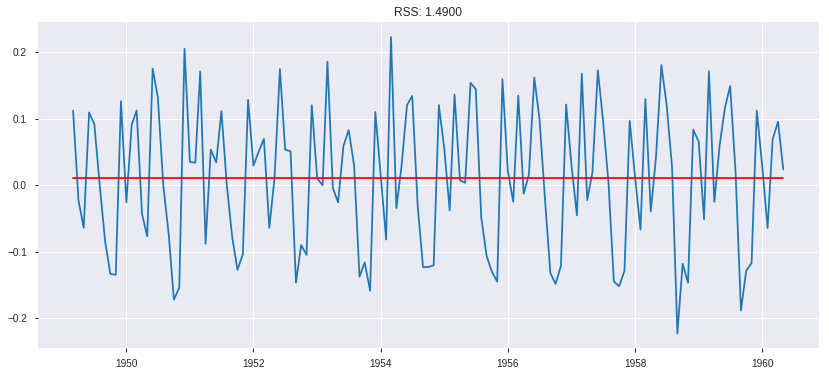

In [71]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

data = [x + random() for x in range(1, 100)]
HWES_model = ExponentialSmoothing(data)
HWES_results = HWES_model.fit()

# make prediction
predictions = SES_results.predict(len(data), len(data))
print("SES Model Prediction: %s" % predictions)

## Treating missing values in a TS

Some TS will have missing dates or times. Basically the data was not captured or was not available for those periods. It could also mean that the measurement was zero on those days in which case you may fill up those periods with zero.

Another important point is that when it comes to TS you should **NOT replace missing values with the mean** of the series, especially if the series is not stationary. What you can do instead for a quick workaround is to forward-fill the previous value.

However depending on the nature of the series, you want to try out multiple approaches before deciding which one to retain. Some effective alternatives to imputation are:

- Backward Fill
- Linear Interpolation
- Quadratic interpolation
- Mean of nearest neighbors
- Mean of seasonal couterparts

To measure the imputation performance we can manually introduce missing values to the TS, impute it with any of the above approaches and then measure the mean squared error (MSE) of the imputed against the actual values.